# Martingale Betting Strategy
# Roh


## We are interested in the two things for two different settings. Two different settings are

1) When we have unlimited money so that we can keep betting

2) When there is a limit on the size of betting (realistic)

## Three things we want to check for 'n' sequential bets:

1) What is the expected number of games sequentially played when we stop playing once we earn 'x' amount of money?
   
  - Then we can calculate the probability of winning x amount of money after n sequential bets
  - And its variance

2) Minimum and Maximum number of game played to earn 'x' amount of money

3) What is the expected value of our winnings after 'n' sequential bets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_result(win_prob):
    result = False
    if np.random.random() <= win_prob:
        result = True
    return result

In [3]:
def simulator_coin(cnt_sim, win_prob, stop, limit=False, limit_size=256):
    
    winnings_all = []
    trial_all = []
    cnt = 0
    
    if limit==False:
        while cnt < cnt_sim:

            winnings = 0
            winnings_trk = [winnings]
            trial = 0

            while winnings < stop:

                tfwin = False
                bet = 1


                while not tfwin:
                    tfwin = get_result(win_prob)

                    if tfwin:
                        winnings += bet

                    else:
                        winnings -= bet
                        bet *= 2

                    trial += 1
                    # keep tracking each simulation
                    winnings_trk.append(winnings)

            # keep track of all simulation
            winnings_all.append(winnings_trk)
            trial_all.append(trial)
            cnt += 1
    
    else:
        while cnt < cnt_sim:

            winnings = 0
            winnings_trk = [winnings]
            trial = 0


            while (winnings < stop) and (winnings > -limit_size):

                tfwin = False
                bet = 1


                while not tfwin:
                    tfwin = get_result(win_prob)

                    if tfwin:
                        winnings += bet

                    else:
                        winnings -= bet
                        bet *= 2
                        
                        # upper bound for bet
                        if bet > (limit_size + winnings):
                            bet = limit_size + winnings
                        
                    trial += 1
                    # keep tracking each simulation
                    winnings_trk.append(winnings)
                    
                    if winnings <= -limit_size:
                        break
                        
            # keep track of all simulation
            winnings_all.append(winnings_trk)
            trial_all.append(trial)
            cnt += 1
    
    return winnings_all, trial_all

# No limit on Betting
# target money x = 50
Simulate 500 times 

In [4]:
np.random.seed(2020)
cnt_sim = 500
p = 0.5
stop = 50
winnings_all, trial_all = simulator_coin(cnt_sim,p,stop,False)

In [5]:
len(winnings_all)

500

## The expected number of game played to earn 50 is 100.

In [6]:
np.mean(trial_all)

99.654

In [7]:
np.var(trial_all)

95.16228399999999

### Check the largest loss for each simulation. This will be shrinked to certain amount of money once we regulate the betting size.

each column in 'df' represents each simulation

(131, 500)


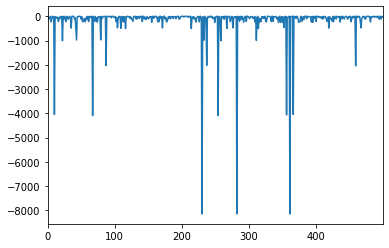

In [8]:
df = pd.DataFrame(winnings_all).T
df.min().plot()
print(df.shape)

In [9]:
np.where(df.min()<-5000)

(array([230, 282, 361]),)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.iloc[:,df.min().idxmin()])

0         0.0
1        -1.0
2         1.0
3         2.0
4         1.0
5         3.0
6         2.0
7         4.0
8         5.0
9         4.0
10        6.0
11        5.0
12        7.0
13        8.0
14        9.0
15       10.0
16       11.0
17       10.0
18        8.0
19        4.0
20       12.0
21       13.0
22       14.0
23       13.0
24       15.0
25       16.0
26       15.0
27       13.0
28       17.0
29       18.0
30       19.0
31       20.0
32       19.0
33       21.0
34       20.0
35       18.0
36       22.0
37       23.0
38       22.0
39       24.0
40       25.0
41       26.0
42       27.0
43       28.0
44       29.0
45       28.0
46       26.0
47       22.0
48       14.0
49       30.0
50       29.0
51       27.0
52       31.0
53       30.0
54       28.0
55       24.0
56       32.0
57       31.0
58       33.0
59       34.0
60       33.0
61       35.0
62       36.0
63       35.0
64       37.0
65       36.0
66       34.0
67       38.0
68       37.0
69       39.0
70       38.0
71    

# The minimum and maximum number of game played

    idxmax(axis=0) : returns the index of maximum value in each column

In [11]:
np.max(df.idxmax(axis=0)), np.min(df.idxmax(axis=0))

(130, 70)

In [12]:
df.idxmax(axis=0).describe()

count    500.000000
mean      99.654000
std        9.764886
min       70.000000
25%       93.000000
50%       99.000000
75%      106.000000
max      130.000000
dtype: float64

# We are only interested in first 100 game played for every simulation.

# Out of 500 simulations, when we stop playing at 100 th game every simulation, how many times did we earn $50 profit?

In [13]:
n = 100
df = df.reindex(range(n)).fillna(method='ffill')
(df.iloc[-1,:]==50).sum() / float(cnt_sim)

0.52

In [14]:
(df.iloc[-1,:]!=50).sum(), (df.iloc[-1,:]!=50).sum()/cnt_sim

(240, 0.48)

In [15]:
np.where(df.iloc[n-1,:]!=50)

(array([  0,   1,   5,   8,  10,  13,  16,  18,  22,  24,  27,  29,  35,
         36,  39,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  52,
         53,  54,  58,  60,  61,  62,  65,  72,  74,  75,  77,  78,  79,
         81,  82,  83,  87,  90,  91,  93,  94,  95,  99, 100, 103, 104,
        106, 107, 108, 110, 111, 113, 116, 117, 120, 121, 124, 125, 127,
        132, 136, 138, 141, 144, 145, 146, 147, 151, 158, 163, 164, 166,
        167, 169, 170, 171, 174, 175, 181, 182, 183, 186, 189, 191, 197,
        198, 199, 200, 202, 203, 206, 210, 212, 216, 218, 220, 221, 222,
        224, 225, 226, 228, 229, 233, 235, 236, 237, 238, 242, 246, 248,
        251, 254, 257, 258, 261, 262, 263, 265, 267, 272, 273, 275, 277,
        280, 282, 286, 289, 290, 291, 292, 293, 299, 303, 305, 309, 311,
        312, 314, 315, 316, 322, 324, 325, 326, 327, 330, 331, 332, 333,
        335, 338, 339, 340, 341, 343, 344, 345, 348, 351, 352, 355, 357,
        361, 362, 366, 369, 370, 371, 374, 375, 376

# When we stop playing at 100 th game every simulation, on average how much do we earn?

In [16]:
(df.iloc[-1,:]).sum() / float(cnt_sim)

44.908

# For the 500 simulations, we plot the final profit after 100 sequential bets

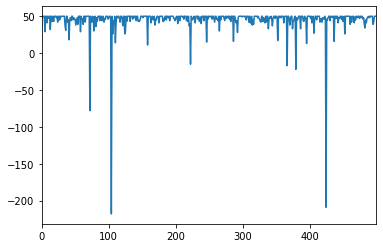

In [17]:
df.iloc[-1,:].plot()

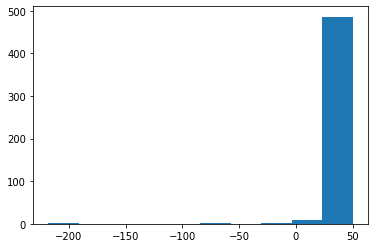

In [18]:
plt.hist(df.iloc[-1,:])
plt.show()

In [19]:
df.iloc[-1,:].idxmin(), df.iloc[-1,104]

(104, -218.0)

# The worst case where we ended up losing -218

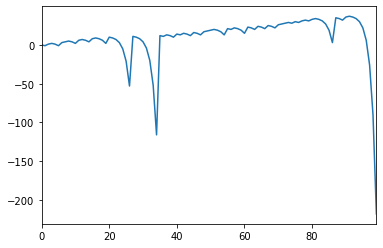

In [20]:
df.iloc[:,104].plot()

# When there is a limit on the bet (realistic assumption)

## Setting is same as above

## When we assume that we have threshold for the size of money on betting (i.e., 256 USD)

Setting 256USD as threshold means that we are unlucky to see 8 consecutive losses from the coin tossing whose theoretical probability is $$(1/2)^8 \approx 0.004$$ 
which is 0.4 percent

In [21]:
np.where(df.min()<-256)

(array([ 10,  22,  35,  42,  43,  67,  79,  87, 109, 116, 171, 214, 230,
        233, 237, 254, 258, 267, 276, 311, 314, 356, 361, 419, 459, 467]),)

In [22]:
np.random.seed(2020)
cnt_sim = 500
p = 0.5
stop = 50
winnings_all, trial_all = simulator_coin(cnt_sim,p,stop,True)

In [23]:
np.mean(trial_all)

109.36

### Variance becomes very large

In [24]:
np.var(trial_all)

5848.130399999999

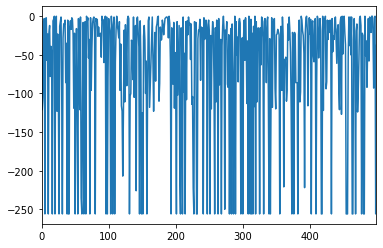

In [25]:
df = pd.DataFrame(winnings_all).T
df.min().plot()

In [26]:
df = df.reindex(range(100)).fillna(method='ffill')

# When there is a limit on the bet size, we can see the probability of obtaining the target profit decreases

In [27]:
(df.iloc[-1,:]==50).sum() / float(cnt_sim)

0.482

# When there is a limit, the estimated expected value of our winning after 170 sequential bets is

In [28]:
(df.iloc[-1,:]).sum() / float(cnt_sim)

4.972

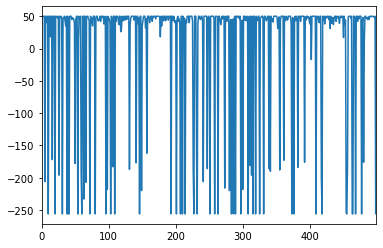

In [29]:
df.iloc[-1,:].plot()

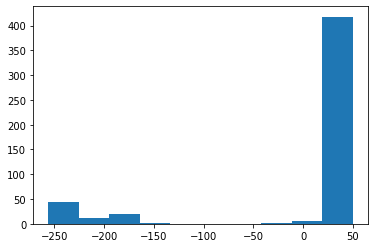

In [30]:
plt.hist(df.iloc[-1,:])
plt.show()